# Ecommerce Consumer Behavior Analysis

## Environment Verification
Testing Jupyter kernel configuration and package availability.

In [2]:
# Testing Kernel and Environment
import sys
print("Python version:", sys.version)
print("Python path:", sys.executable)

# Testing essential package availability
try:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("All data science packages available!")
    print("pandas version:", pd.__version__)
except ImportError as e:
    print("Package import failed:", e)

Python version: 3.12.11 (main, Jul  2 2025, 01:02:42) [GCC 10.2.1 20210110]
Python path: /usr/local/bin/python
All data science packages available!
pandas version: 2.3.2


## Data Loading

In [292]:
import pandas as pd

file_path = '../data/Ecommerce_Consumer_Behavior_Analysis_Data.csv'
df = pd.read_csv(file_path)
df.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Social_Media_Influence,Discount_Sensitivity,Return_Rate,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,4,Mixed,5,5,2.0,NaN,Somewhat Sensitive,1,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,11,In-Store,3,1,2.0,Medium,Not Sensitive,1,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,2,Mixed,5,5,0.3,Low,Not Sensitive,1,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,6,Mixed,3,1,1.0,High,Somewhat Sensitive,0,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,6,Mixed,3,4,0.0,Medium,Not Sensitive,2,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

## Data Cleaning

In [294]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine the results into a single DataFrame for easy viewing
missing_info = pd.DataFrame(
    {'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display columns with missing values, sorted by percentage
print(missing_info[missing_info['Missing Values'] >
      0].sort_values(by='Percentage', ascending=False))

                        Missing Values  Percentage
Engagement_with_Ads                256        25.6
Social_Media_Influence             247        24.7


In [295]:
df['Engagement_with_Ads'] = df['Engagement_with_Ads'].fillna('None')
df['Social_Media_Influence'] = df['Social_Media_Influence'].fillna('None')
print(df.isnull().sum())

Customer_ID                              0
Age                                      0
Gender                                   0
Income_Level                             0
Marital_Status                           0
Education_Level                          0
Occupation                               0
Location                                 0
Purchase_Category                        0
Purchase_Amount                          0
Frequency_of_Purchase                    0
Purchase_Channel                         0
Brand_Loyalty                            0
Product_Rating                           0
Time_Spent_on_Product_Research(hours)    0
Social_Media_Influence                   0
Discount_Sensitivity                     0
Return_Rate                              0
Customer_Satisfaction                    0
Engagement_with_Ads                      0
Device_Used_for_Shopping                 0
Payment_Method                           0
Time_of_Purchase                         0
Discount_Us

In [296]:
# Correct Data Types
df['Purchase_Amount'] = df['Purchase_Amount'].str.replace(
    '$', '', regex=False).astype(float)
print("Data type of 'Purchase_Amount' after cleaning:")
print(df['Purchase_Amount'].dtype)

Data type of 'Purchase_Amount' after cleaning:
float64


In [297]:
# Correct Data Types
df['Time_of_Purchase'] = pd.to_datetime(
    df['Time_of_Purchase'], errors='coerce')
print("Data type of 'Time_of_Purchase' after cleaning:")
print(df['Time_of_Purchase'].dtype)

Data type of 'Time_of_Purchase' after cleaning:
datetime64[ns]


## Data Exploration

In [298]:
pd.set_option('display.max_columns', None)
df.describe(include='all')

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Social_Media_Influence,Discount_Sensitivity,Return_Rate,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
count,1000,1000.000000,1000,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1000,1000,1000,1000,1000,1000,1000,1000,1000.000000
unique,1000,NaN,8,2,4,3,2,969,24,NaN,NaN,3,NaN,NaN,NaN,4,3,NaN,NaN,4,3,5,NaN,2,2,4,3,NaN
top,37-611-6911,NaN,Female,High,Widowed,Bachelor's,High,Oslo,Electronics,NaN,NaN,Mixed,NaN,NaN,NaN,High,Very Sensitive,NaN,NaN,High,Desktop,PayPal,NaN,True,False,Need-based,No Preference,NaN
freq,1,NaN,452,515,260,341,517,4,54,NaN,NaN,340,NaN,NaN,NaN,268,350,NaN,NaN,270,350,219,NaN,521,509,256,372,NaN
mean,NaN,34.304000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.063880,6.945000,NaN,3.026000,3.033000,1.013030,NaN,NaN,0.954000,5.399000,NaN,NaN,NaN,2024-06-29 06:31:40.800000,NaN,NaN,NaN,NaN,7.547000
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.710000,2.000000,NaN,1.000000,1.000000,0.000000,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,2024-01-01 00:00:00,NaN,NaN,NaN,NaN,1.000000
25%,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.235000,4.000000,NaN,2.000000,2.000000,0.000000,NaN,NaN,0.000000,3.000000,NaN,NaN,NaN,2024-04-04 00:00:00,NaN,NaN,NaN,NaN,4.000000
50%,NaN,34.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.165000,7.000000,NaN,3.000000,3.000000,1.000000,NaN,NaN,1.000000,5.000000,NaN,NaN,NaN,2024-06-30 00:00:00,NaN,NaN,NaN,NaN,8.000000
75%,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388.982500,10.000000,NaN,4.000000,4.000000,2.000000,NaN,NaN,2.000000,8.000000,NaN,NaN,NaN,2024-09-19 00:00:00,NaN,NaN,NaN,NaN,11.000000
max,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,498.330000,12.000000,NaN,5.000000,5.000000,2.000000,NaN,NaN,2.000000,10.000000,NaN,NaN,NaN,2024-12-30 00:00:00,NaN,NaN,NaN,NaN,14.000000


In [299]:
print("Purchase Category Distribution:\n",
      df['Purchase_Category'].value_counts().head(10))

Purchase Category Distribution:
 Purchase_Category
Electronics              54
Sports & Outdoors        51
Jewelry & Accessories    50
Home Appliances          50
Toys & Games             47
Animal Feed              44
Food & Beverages         44
Gardening & Outdoors     44
Software & Apps          43
Packages)                43
Name: count, dtype: int64


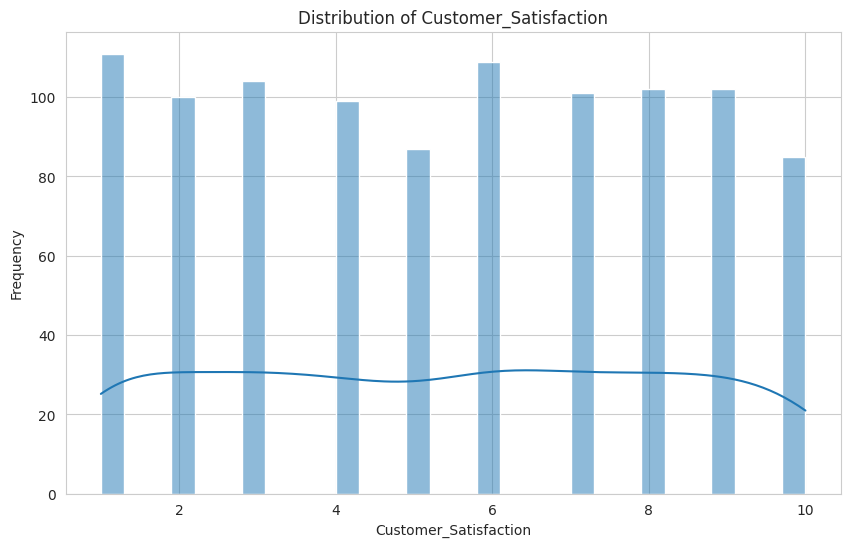

In [300]:
# histplot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(df['Customer_Satisfaction'], bins=30, kde=True)
plt.title('Distribution of Customer_Satisfaction')
plt.xlabel('Customer_Satisfaction')
plt.ylabel('Frequency')
plt.show()

### - RMF Customer Segmentation

In [301]:
import datetime as dt

# Calculate R, F, M Values

snapshot_date = df['Time_of_Purchase'].max() + dt.timedelta(days=1)
print(f"Snapshot Date: {snapshot_date}")

rfm_df = df.groupby('Customer_ID').agg({
    # Recency: Days since last purchase
    'Time_of_Purchase': lambda date: (snapshot_date - date.max()).days,
    # Frequency: Total number of purchases
    'Frequency_of_Purchase': 'sum',
    # Monetary: Total amount spent
    'Purchase_Amount': 'sum'
})

rfm_df.rename(columns={'Time_of_Purchase': 'Recency',
                       'Frequency_of_Purchase': 'Frequency',
                       'Purchase_Amount': 'Monetary'}, inplace=True)

print("\nRFM DataFrame:")
print(rfm_df.head())

Snapshot Date: 2024-12-31 00:00:00

RFM DataFrame:
             Recency  Frequency  Monetary
Customer_ID                              
00-107-4749      103          5    178.04
00-149-4481      331          2    464.76
00-264-3797      258          2    128.01
00-265-0556       60         10     68.02
00-275-9990      186         11    302.74


In [302]:
# Create R, F, M Scores & is_churn

rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(
    method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm_df['is_churn'] = (rfm_df['Recency'] > 180).astype(int)

print("\nRFM DataFrame with Scores:")
print(rfm_df.head())


RFM DataFrame with Scores:
             Recency  Frequency  Monetary R_Score F_Score M_Score  is_churn
Customer_ID                                                                
00-107-4749      103          5    178.04       4       2       2         0
00-149-4481      331          2    464.76       1       1       5         1
00-264-3797      258          2    128.01       2       1       1         1
00-265-0556       60         10     68.02       5       4       1         0
00-275-9990      186         11    302.74       3       5       3         1


In [303]:
# Customer Segmentation

rfm_df['RF_Segment'] = rfm_df['R_Score'].astype(
    str) + rfm_df['F_Score'].astype(str)
# rfm_df['RFM_Score'] = rfm_df[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

segment_map = {
    # Not purchased recently & rarely buy - Dormant/Lost customers
    r'[1-2][1-2]': 'Hibernating',
    # Not recent but previously active - Risk of churn
    r'[1-2][3-4]': 'At-Risk',
    # Not recent but were highly active - High-value at risk
    r'[1-2]5': 'Cannot Lose Them',
    # Moderately recent but low frequency - Becoming inactive
    r'3[1-2]': 'About to Sleep',
    # Average recency & frequency - Need re-engagement
    r'33': 'Need Attention',
    # Fairly recent & frequent purchases - Core loyal base
    r'[3-4][4-5]': 'Loyal Customers',
    # Recent but only one purchase - Promising newcomers
    r'41': 'Promising',
    # Very recent first purchase - Brand new customers
    r'51': 'New Customers',
    # Recent with some repetition - Developing loyalty
    r'[4-5][2-3]': 'Potential Loyalists',
    # Very recent & very frequent - Best customers
    r'5[4-5]': 'Champions'
}

rfm_df['Segment'] = rfm_df['RF_Segment'].replace(segment_map, regex=True)

print("\nRFM DataFrame with Segment:")
print(rfm_df.head())


RFM DataFrame with Segment:
             Recency  Frequency  Monetary R_Score F_Score M_Score  is_churn  \
Customer_ID                                                                   
00-107-4749      103          5    178.04       4       2       2         0   
00-149-4481      331          2    464.76       1       1       5         1   
00-264-3797      258          2    128.01       2       1       1         1   
00-265-0556       60         10     68.02       5       4       1         0   
00-275-9990      186         11    302.74       3       5       3         1   

            RF_Segment              Segment  
Customer_ID                                  
00-107-4749         42  Potential Loyalists  
00-149-4481         11          Hibernating  
00-264-3797         21          Hibernating  
00-265-0556         54            Champions  
00-275-9990         35      Loyal Customers  


## Feature Engineering

In [304]:
# Merge the RFM clustering results back into the main table

customer_segments = rfm_df.reset_index(
)[['Customer_ID', 'Segment', 'is_churn', 'Recency', 'Frequency', 'Monetary']]
df = pd.merge(df, customer_segments, on='Customer_ID', how='left')

In [ ]:
# Data preparation

import numpy as np

y = df['is_churn']

features_df = df.drop(
    columns=['Customer_ID', 'Time_of_Purchase', 'Location', 'is_churn', 'Recency', 'Frequency'])

features_df['Customer_Loyalty_Program_Member'] = features_df['Customer_Loyalty_Program_Member'].astype(
    int)
features_df['Discount_Used'] = features_df['Discount_Used'].astype(int)

numerical_cols = features_df.select_dtypes(
    include=['int64', 'float64']).columns
categorical_cols = features_df.select_dtypes(include=['object']).columns

print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)

Numerical Columns:
Index(['Age', 'Purchase_Amount', 'Frequency_of_Purchase', 'Brand_Loyalty',
       'Product_Rating', 'Time_Spent_on_Product_Research(hours)',
       'Return_Rate', 'Customer_Satisfaction', 'Discount_Used',
       'Customer_Loyalty_Program_Member', 'Time_to_Decision', 'Monetary'],
      dtype='object')

Categorical Columns:
Index(['Gender', 'Income_Level', 'Marital_Status', 'Education_Level',
       'Occupation', 'Purchase_Category', 'Purchase_Channel',
       'Social_Media_Influence', 'Discount_Sensitivity', 'Engagement_with_Ads',
       'Device_Used_for_Shopping', 'Payment_Method', 'Purchase_Intent',
       'Shipping_Preference', 'Segment'],
      dtype='object')


In [313]:
# One-Hot Encoding

encoded_df = pd.get_dummies(
    features_df, columns=categorical_cols, drop_first=True, dtype=int)

In [314]:
# Normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
encoded_df[numerical_cols] = scaler.fit_transform(encoded_df[numerical_cols])

In [315]:
X = encoded_df
X.head()

,Age,Purchase_Amount,Frequency_of_Purchase,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Return_Rate,Customer_Satisfaction,Discount_Used,Customer_Loyalty_Program_Member,Time_to_Decision,Monetary,Gender_Bigender,Gender_Female,Gender_Genderfluid,Gender_Genderqueer,Gender_Male,Gender_Non-binary,Gender_Polygender,Income_Level_Middle,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widowed,Education_Level_High School,Education_Level_Master's,Occupation_Middle,Purchase_Category_Arts & Crafts,Purchase_Category_Baby Products,Purchase_Category_Beauty & Personal Care,Purchase_Category_Books,Purchase_Category_Clothing,Purchase_Category_Electronics,Purchase_Category_Food & Beverages,Purchase_Category_Furniture,Purchase_Category_Gardening & Outdoors,Purchase_Category_Groceries,Purchase_Category_Health Care,Purchase_Category_Health Supplements,Purchase_Category_Home Appliances,Purchase_Category_Hotels,Purchase_Category_Jewelry & Accessories,Purchase_Category_Luxury Goods,Purchase_Category_Mobile Accessories,Purchase_Category_Office Supplies,Purchase_Category_Packages),Purchase_Category_Software & Apps,Purchase_Category_Sports & Outdoors,Purchase_Category_Toys & Games,Purchase_Category_Travel & Leisure (Flights,Purchase_Channel_Mixed,Purchase_Channel_Online,Social_Media_Influence_Low,Social_Media_Influence_Medium,Social_Media_Influence_None,Discount_Sensitivity_Somewhat Sensitive,Discount_Sensitivity_Very Sensitive,Engagement_with_Ads_Low,Engagement_with_Ads_Medium,Engagement_with_Ads_None,Device_Used_for_Shopping_Smartphone,Device_Used_for_Shopping_Tablet,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Other,Payment_Method_PayPal,Purchase_Intent_Need-based,Purchase_Intent_Planned,Purchase_Intent_Wants-based,Shipping_Preference_No Preference,Shipping_Preference_Standard,Segment_At-Risk,Segment_Cannot Lose Them,Segment_Champions,Segment_Hibernating,Segment_Loyal Customers,Segment_Need Attention,Segment_New Customers,Segment_Potential Loyalists,Segment_Promising
0,-1.316138,0.446774,-0.936173,1.393975,1.369839,1.247109,0.056799,0.558420,0.958846,-0.982159,-1.375120,0.446774,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1.572007,-0.401955,1.289026,-0.018360,-1.415802,1.247109,0.056799,-0.139169,0.958846,-0.982159,-0.383506,-0.401955,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0
2,-1.102202,1.149763,-1.571944,1.393975,1.369839,-0.900966,0.056799,0.558420,0.958846,1.018165,-1.127216,1.149763,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,-0.567360,-1.321652,-0.300402,-0.018360,-1.415802,-0.016464,-1.177972,-1.534346,0.958846,1.018165,0.608107,-1.321652,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,-0.139487,-0.481975,-0.300402,-0.018360,0.673429,-1.280038,1.291571,1.604803,-1.042920,-0.982159,-0.879313,-0.481975,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0


## Machine Learning with LR

In [316]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# --- Split the data into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("--- Data Split ---")
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target distribution:", pd.Series(
    y_train).value_counts(normalize=True))
print("Testing target distribution:", pd.Series(
    y_test).value_counts(normalize=True))

# --- Initialize and train the Logistic Regression model ---
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)  # Train the model on training data

# --- Make predictions and evaluate model performance ---
y_pred = model.predict(X_test)  # Predict labels for test set

print("\n--- Model Performance ---")
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
print(f"Accuracy: {accuracy:.4f}")

# Get coefficients to understand which features drive predictions
if hasattr(model, 'coef_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'coefficient': model.coef_[0]
    }).sort_values('coefficient', key=abs, ascending=False)
    print("\nTop 10 most important features:")
    print(feature_importance.head(10))

--- Data Split ---
Training features shape: (800, 79)
Testing features shape: (200, 79)
Training target distribution: is_churn
1    0.51125
0    0.48875
Name: proportion, dtype: float64
Testing target distribution: is_churn
1    0.51
0    0.49
Name: proportion, dtype: float64

--- Model Performance ---
Accuracy: 0.9050

Top 10 most important features:
                              feature  coefficient
73                Segment_Hibernating     3.708009
77        Segment_Potential Loyalists    -3.686125
70                    Segment_At-Risk     3.546724
72                  Segment_Champions    -3.179884
71           Segment_Cannot Lose Them     2.966073
76              Segment_New Customers    -2.570705
78                  Segment_Promising    -2.463035
74            Segment_Loyal Customers    -1.324244
12                    Gender_Bigender    -0.594408
45  Purchase_Category_Software & Apps    -0.593592


## Machine Learning with XGBoost

XGBoost Accuracy: 0.8900
XGBoost AUC: 0.9764

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89        98
           1       0.94      0.83      0.89       102

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.90      0.89      0.89       200



/home/vscode/.local/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning:

[13:41:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




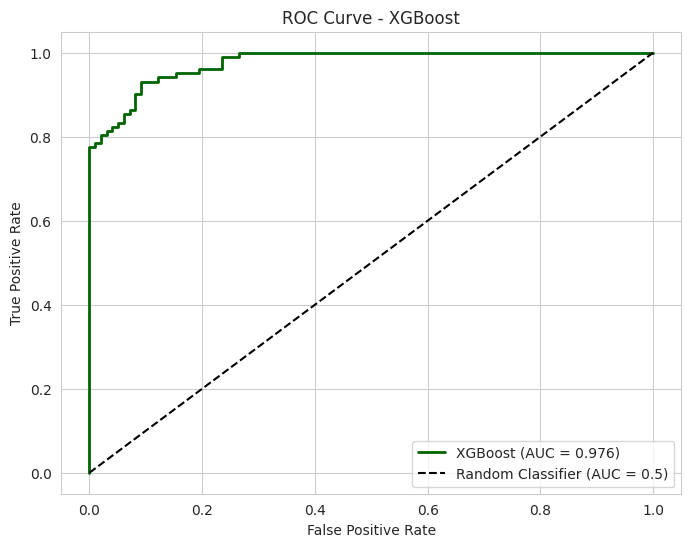

In [324]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# --- Initialize and train the XGBoost model ---
xgb_model = XGBClassifier(
    n_estimators=100,        # Number of trees (boosting rounds)
    random_state=42,         # For reproducible results
    learning_rate=0.1,       # Step size shrinkage to prevent overfitting
    max_depth=3,             # Maximum tree depth
    subsample=0.8,           # Subsample ratio of the training instances
    colsample_bytree=0.8,    # Subsample ratio of columns when constructing each tree
    eval_metric='logloss',   # Evaluation metric for binary classification
    use_label_encoder=False  # Avoid warning messages
)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)

# Calculate accuracy and AUC
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_auc = roc_auc_score(y_test, xgb_pred_proba[:, 1])

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"XGBoost AUC: {xgb_auc:.4f}")

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred_proba[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(
    fpr, tpr, label=f'XGBoost (AUC = {xgb_auc:.3f})', color='darkgreen', lw=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Visualization

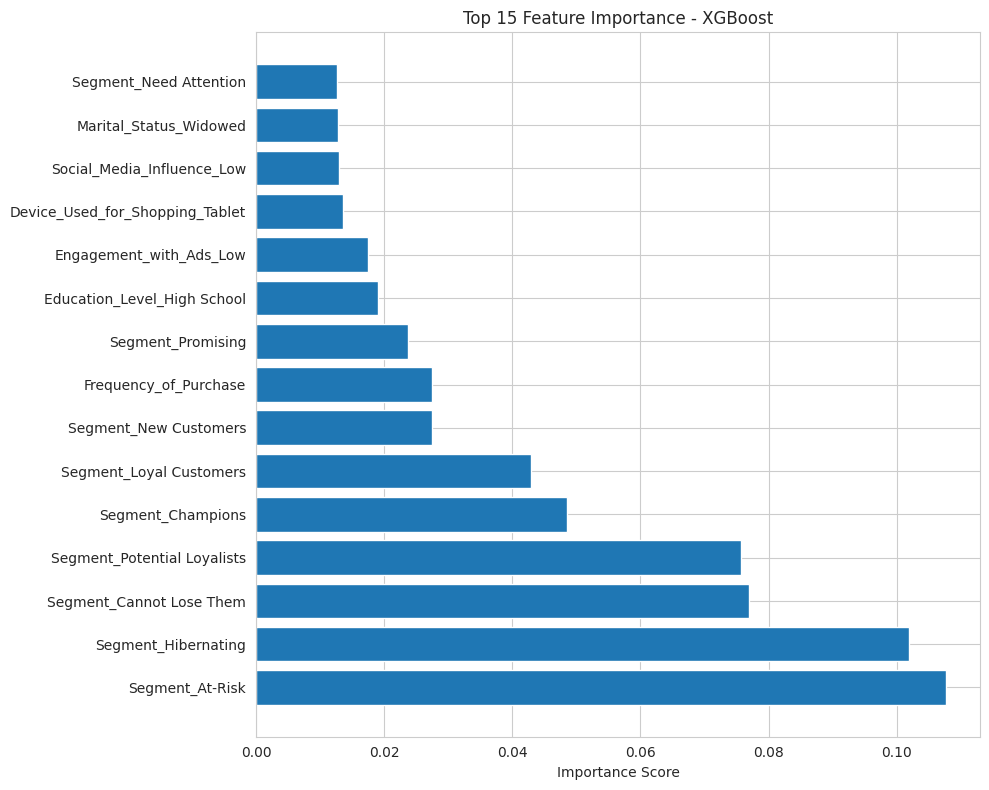

In [325]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance['feature'].head(15),
         feature_importance['importance'].head(15))
plt.title('Top 15 Feature Importance - XGBoost')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()